In [10]:
# Import the necessary packages and libraries
import cv2
import matplotlib.pyplot as plt

In [11]:
# A function to find the keypoints and descriptors on our images using SIFT
def img_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name, 0)
    kp, desc = detector.detectAndCompute(img, None)
    return img, kp, desc

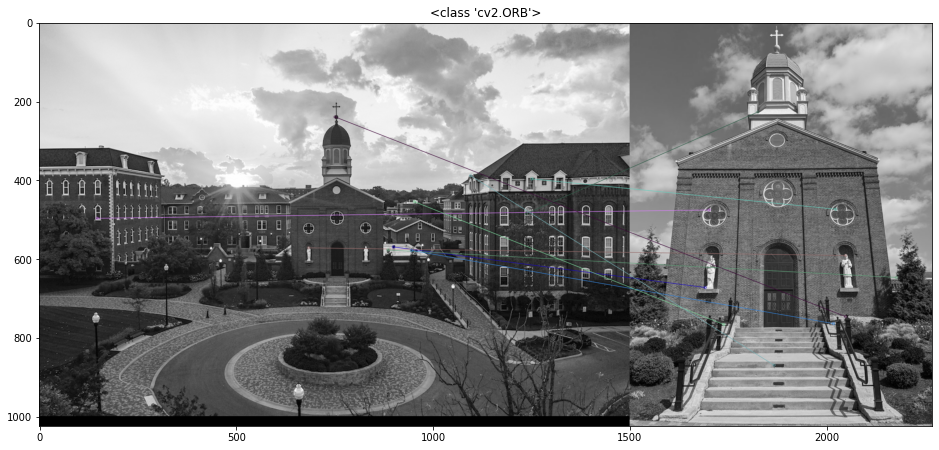

In [13]:

def draw(detector, img1_name, img2_name, nmatches=10):
    
    # Find the key points and descriptor using our function
    img1, kp1, desc1 = img_detect_and_compute(detector, img1_name)
    img2, kp2, desc2 = img_detect_and_compute(detector, img2_name)
    
    # create the BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    # Match the descriptors
    matches = bf.match(desc1, desc2)
    
    # Sort the matches by distance
    matches = sorted(matches, key = lambda x:x.distance)
    
    # Draw first 10 matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], None, flags=2)
    
    # Display the keypoints on the images
    plt.figure(figsize=(16,16))
    plt.title(type(detector))
    plt.imshow(img_matches)
    plt.show()

orb = cv2.ORB_create()
draw(orb, 'ud.jpg', 'ud_chapel_1.jpg')